In [ ]:
!pip install kaggle
!pip install streamlit
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.8/731.8 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-7.0.1-py3-none-any.whl size=21122 sha256=c5d1baf13c20a5a94a40414b9042d174996098dbd61c51473f0d4a143c0b366d
  Stored in directory: /root/.cache/pip/wheels/3b/32/0e/27789b6fde02bf2b320d6f1a0fd9e1354b257c5f75eefc29bc
Successfully built pyngrok


In [ ]:
#configure the path of kaggle dataset json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c cifar-10

100% 715M/715M [00:05<00:00, 126MB/s]
100% 715M/715M [00:05<00:00, 145MB/s]


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [ ]:
#extracting the zip file of dataset
from zipfile import ZipFile
dataset='/content/cifar-10.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("dataset is extracted")

dataset is extracted


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [ ]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 69.4 MB/s eta 0:00:00


In [ ]:
import py7zr
archive=py7zr.SevenZipFile('/content/train.7z',mode='r')
archive.extractall()
archive.close()

In [ ]:
!ls

cifar-10.zip  sample_data  sampleSubmission.csv  test.7z  train  train.7z  trainLabels.csv


In [ ]:
#import the dependencies
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
filenames= os.listdir('/content/train')

In [ ]:
type(filenames)

list

In [ ]:
len(filenames)

50000

In [ ]:
print(filenames[0:5])
print(filenames[-5:])

['13463.png', '33712.png', '28812.png', '42143.png', '11062.png']
['18637.png', '47711.png', '19725.png', '13741.png', '27443.png']


In [ ]:
#label processing
labels_df=pd.read_csv('/content/trainLabels.csv')

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df[labels_df['id']==37611]

,id,label
37610,37611,dog


In [ ]:
#reading the image in order
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [ ]:
labels_dictionary={'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}

labels=[labels_dictionary[i]for i in labels_df['label']]

In [ ]:
print(labels[0:5])

[6, 9, 9, 4, 1]


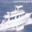

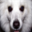

In [ ]:
#displaying the image
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/train/24387.png')
cv2_imshow(img)
img2=cv2.imread('/content/train/37611.png')
cv2_imshow(img2)

In [ ]:
labels_df[labels_df['id']==24387]

,id,label
24386,24387,ship


In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
id_list=list(labels_df['id'])

In [ ]:
print(id_list[-5:])

[49996, 49997, 49998, 49999, 50000]


In [ ]:
#image processing
#convert the image to numpy arrays
train_data_folder='/content/train/'
data=[]

for id in id_list:
  image=Image.open(train_data_folder+str(id)+'.png')
  image=np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

50000

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(32, 32, 3)

In [ ]:
data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
#convert images list and labels list to numpy arrays
X=np.array(data)
y=np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
print(X.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


In [ ]:
#train test splits
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
#scaling the data
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
X_train_scaled[0]

array([[[0.81960784, 0.76470588, 0.81568627],
        [0.78823529, 0.77647059, 0.82745098],
        [0.85490196, 0.84705882, 0.88627451],
        ...,
        [0.77647059, 0.77647059, 0.77254902],
        [0.80392157, 0.80392157, 0.80784314],
        [0.84705882, 0.84705882, 0.8627451 ]],

       [[0.75686275, 0.6627451 , 0.71764706],
        [0.77647059, 0.74901961, 0.8       ],
        [0.88235294, 0.88627451, 0.91764706],
        ...,
        [0.7254902 , 0.71764706, 0.71372549],
        [0.8       , 0.79607843, 0.80392157],
        [0.82352941, 0.81568627, 0.83529412]],

       [[0.75686275, 0.64705882, 0.69803922],
        [0.78039216, 0.74509804, 0.79215686],
        [0.90588235, 0.91372549, 0.93333333],
        ...,
        [0.80784314, 0.79215686, 0.79215686],
        [0.82745098, 0.81176471, 0.82352941],
        [0.81568627, 0.8       , 0.81960784]],

       ...,

       [[0.83921569, 0.83921569, 0.78431373],
        [0.83529412, 0.83137255, 0.79215686],
        [0.6       , 0

In [ ]:
#import library for the neural network
import tensorflow as tf
from tensorflow import keras

In [ ]:
number_of_classes=10
#setting the layer of neural network
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(number_of_classes,activation='softmax')
])

In [ ]:
#compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
#training the neural network
model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 [==============================] - 9s 4ms/step - loss: 1.9331 - acc: 0.3075 - val_loss: 1.7827 - val_acc: 0.3620
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7894 - acc: 0.3577 - val_loss: 1.7370 - val_acc: 0.3787
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7284 - acc: 0.3810 - val_loss: 1.6754 - val_acc: 0.4080
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.6994 - acc: 0.3935 - val_loss: 1.6608 - val_acc: 0.4115
Epoch 5/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.6743 - acc: 0.4032 - val_loss: 1.6558 - val_acc: 0.4153
Epoch 6/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.6551 - acc: 0.4121 - val_loss: 1.6680 - val_acc: 0.4130
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.6334 - acc: 0.4213 - val_loss: 1.6144 - val_acc: 0.4322
Epoch 8/10
1125/1125 [==============================] - 3s 3ms

In [ ]:
#ResNet50
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
#convolutional layers
convolutional_base=ResNet50(weights='imagenet',include_top='False',input_shape=(224,224,3))
convolutional_base.summary()

102967424/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                    

In [ ]:
number_of_classes=10
model=models.Sequential()
model.add(layers.UpSampling2D((7,7)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(number_of_classes,activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=3e-5),loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
history= model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 [==============================] - 403s 328ms/step - loss: 2.1528 - acc: 0.2979 - val_loss: 1.2050 - val_acc: 0.6380
Epoch 2/10
1125/1125 [==============================] - 368s 327ms/step - loss: 1.1160 - acc: 0.6697 - val_loss: 0.5225 - val_acc: 0.8645
Epoch 3/10
1125/1125 [==============================] - 368s 327ms/step - loss: 0.7643 - acc: 0.8097 - val_loss: 0.3984 - val_acc: 0.8935
Epoch 4/10
1125/1125 [==============================] - 359s 319ms/step - loss: 0.5857 - acc: 0.8661 - val_loss: 0.9297 - val_acc: 0.8455
Epoch 5/10
1125/1125 [==============================] - 367s 327ms/step - loss: 0.4166 - acc: 0.9177 - val_loss: 0.3081 - val_acc: 0.9193
Epoch 6/10
1125/1125 [==============================] - 368s 327ms/step - loss: 0.3034 - acc: 0.9473 - val_loss: 0.2843 - val_acc: 0.9262
Epoch 7/10
1125/1125 [==============================] - 368s 327ms/step - loss: 0.2371 - acc: 0.9612 - val_loss: 0.3250 - val_acc: 0.9237
Epoch 8/10
1125/1125 [============

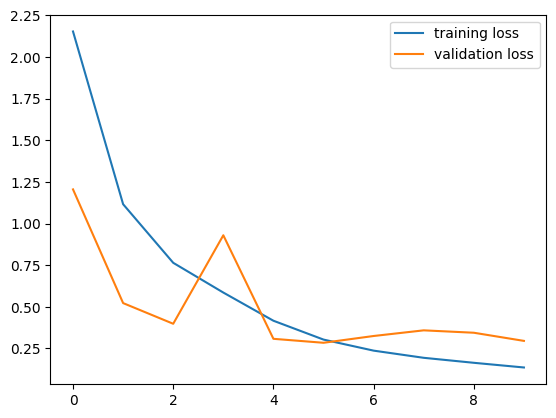

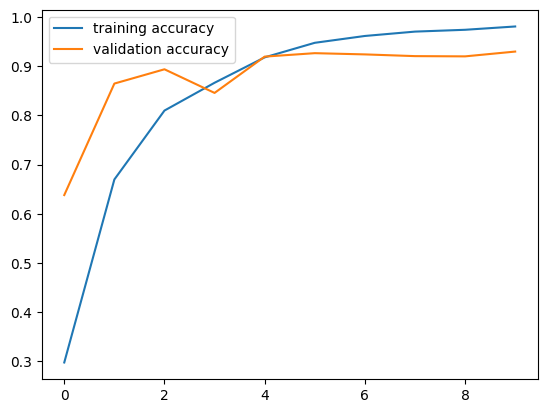

In [ ]:
h=history
#plotting of the loss value
plt.plot(h.history['loss'],label='training loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

#plotting of accuracy value
plt.plot(h.history['acc'],label='training accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
pred=model.evaluate(X_test_scaled,y_test,verbose=0)


In [ ]:
print(f'model test score {pred[0]}')
print(f'model test accuracy {pred[1]}')

model test score 0.27010074257850647
model test accuracy 0.9358999729156494


In [ ]:
model.save('object_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pickle

In [ ]:
with open('label.pkl', 'wb')  as file:
  pickle.dump(labels_dictionary, file)

In [ ]:
[x for x in labels_dictionary if labels_dictionary[x] == 1][0]

'automobile'

In [ ]:
labels_dictionary

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [ ]:
a = labels_dictionary

In [ ]:
type(a.keys())

dict_keys

In [ ]:
Assuming_test_set is your_test_data_generator
class_indices = test_set.class_indices

# Invert the dictionary to map indices to class names
class_names = {v: k for k, v in class_indices.items()}

# Print the mapping
for label, class_name in class_names.items():
    print(f"Class {label} is {class_name}")

NameError: ignored